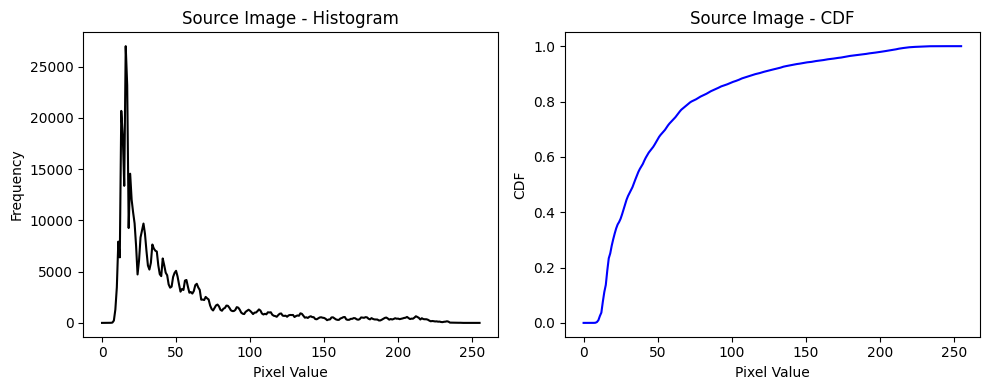

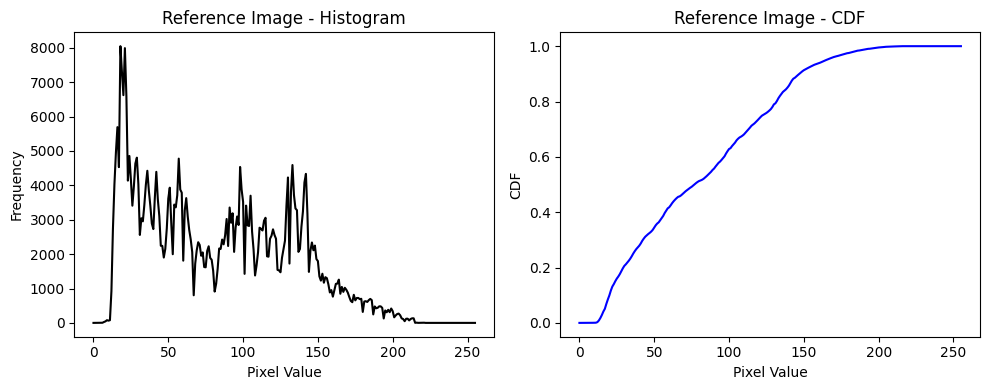

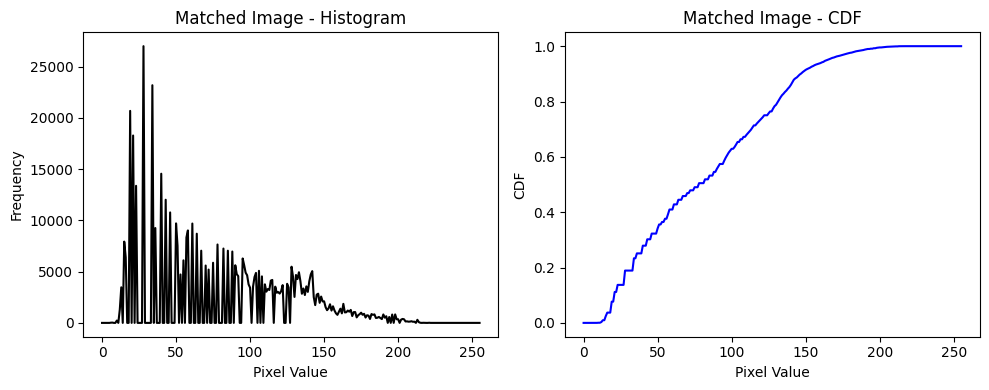

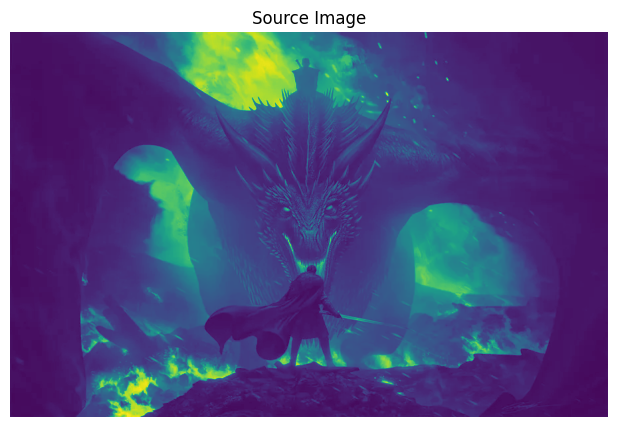

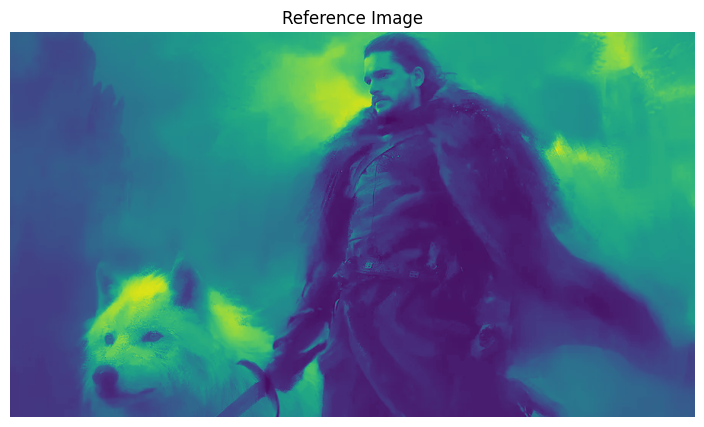

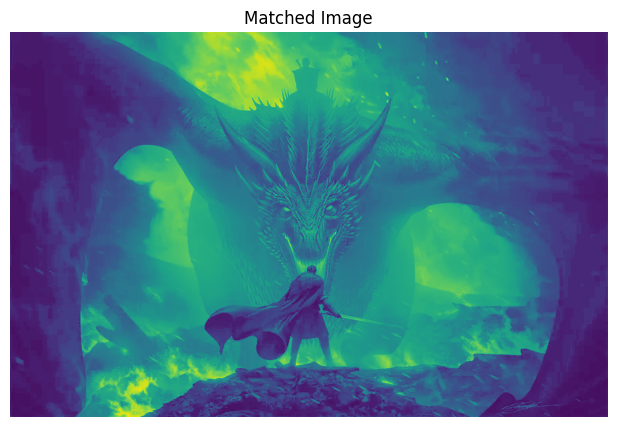

In [2]:
import cv2, numpy as np, matplotlib.pyplot as plt

def calculate_histogram(image): return np.histogram(image.flatten(), 256, [0, 256])[0]
def calculate_cdf(hist): cdf = hist.cumsum(); return cdf / cdf.max()
def create_mapping_function(src_cdf, ref_cdf): return np.array([np.argmin(np.abs(ref_cdf - src_cdf[i])) for i in range(256)])

def apply_mapping(image, mapping): return cv2.LUT(image, mapping.astype('uint8'))
def histogram_matching(src_image, ref_image):
    src_hist, ref_hist = calculate_histogram(src_image), calculate_histogram(ref_image)
    src_cdf, ref_cdf = calculate_cdf(src_hist), calculate_cdf(ref_hist)
    mapping = create_mapping_function(src_cdf, ref_cdf)
    return apply_mapping(src_image, mapping)

def plot_histogram_and_cdf(image, title):
    hist, cdf = calculate_histogram(image), calculate_cdf(calculate_histogram(image))
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1); plt.plot(hist); plt.title(f'{title} - Histogram'); plt.xlabel('Pixel Value'); plt.ylabel('Frequency')
    plt.subplot(1, 2, 2); plt.plot(cdf); plt.title(f'{title} - CDF'); plt.xlabel('Pixel Value'); plt.ylabel('CDF')
    plt.tight_layout(); plt.show()

def display_image(image, title):
    plt.imshow(image, cmap='gray'); plt.title(title); plt.axis('off'); plt.show()

# Load images
src_img = cv2.imread('p3.jpg.jpg', cv2.IMREAD_GRAYSCALE)
ref_img = cv2.imread('p4.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogram matching
matched_img = histogram_matching(src_img, ref_img)
cv2.imwrite('matched_image.jpg', matched_img)

# Plot and display images
for img, title in zip([src_img, ref_img, matched_img], ['Source', 'Reference', 'Matched']):
    plot_histogram_and_cdf(img, title)
    display_image(img, title)

